<a href="https://colab.research.google.com/github/JesusBD11/Algoritmia/blob/main/IndividualJesus4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neural_network import MLPRegressor

# Apartado A

Vamos a crear los tres datasets

In [4]:
X, Y = fetch_openml(name = "rmftsa_ladata", as_frame = True, return_X_y = True)


/usr/local/lib/python3.7/dist-packages/sklearn/datasets/_openml.py:418: UserWarning: Multiple active versions of the dataset matching the name rmftsa_ladata exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]["version"])


Dataset Original

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0) #Dataset orignial

Dataset estandarizado

In [6]:
scaler = StandardScaler() #Dataset estandarizado
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dataset aplicando MinMax Scaler

In [7]:
min_max_scaler = MinMaxScaler() #Dataset min_max_scaler
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)


# Apartado B



Para la realización de la experimentación vamos a crear tres diccionarios y guardar ahi los scores de cada Dataset con las diferentes combinaciones de Size y numero de epochs.

In [ ]:
tamHidenLayer = [10, 100,1000]
maxIters = [250, 500, 1000]
randomseed = list(range(1,10,1))

dicOriginal = {} #Diccionario para el dataSet original
dicStandar = {} #Diccionario para el dataSet estandarizado
dicMinMax = {} #Diccionario para el dataSet MinMax

for i in tamHidenLayer:
  for j in maxIters:

    scoresTest = [] #listas auxiliares para guardar los scores de cada combinacion
    scoresTrain = []

    scoresTrainStandar = []
    scoresTestStandar = []

    scoresTrainMinMax = []
    scoresTestMinMax = []

    for k in randomseed: #Para cada combinación usamos 10 seeds diferentes
      
      regr = MLPRegressor(hidden_layer_sizes=i, activation='relu', random_state=k, max_iter=j).fit(X_train, Y_train)
      regrScaled = MLPRegressor(hidden_layer_sizes=i, activation='relu', random_state=k, max_iter=j).fit(X_train_scaled, Y_train)
      regrMinMax = MLPRegressor(hidden_layer_sizes=i, activation='relu', random_state=k, max_iter=j).fit(X_train_minmax, Y_train)

      scoresTest.append(regr.score(X_test, Y_test))
      scoresTrain.append(regr.score(X_train, Y_train))

      scoresTestStandar.append(regrScaled.score(X_test_scaled, Y_test))
      scoresTrainStandar.append(regrScaled.score(X_train_scaled, Y_train))

      scoresTrainMinMax.append(regrMinMax.score(X_train_minmax, Y_train))
      scoresTestMinMax.append(regrMinMax.score(X_test_minmax, Y_test))



    nom = str(i) + "-" + str(j) 
    dicOriginal[nom] = (scoresTest, scoresTrain) #Guardamos los scores para los datos de test y de train
    dicStandar[nom] = (scoresTestStandar, scoresTrainStandar)
    dicMinMax[nom] = ( scoresTestMinMax,scoresTrainMinMax)










A continuación mostramos los boxplot de cada combinación Size-NºEpochs.

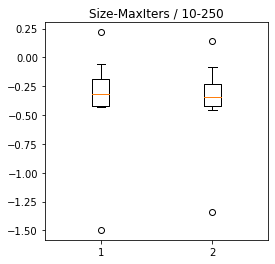

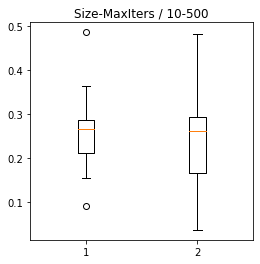

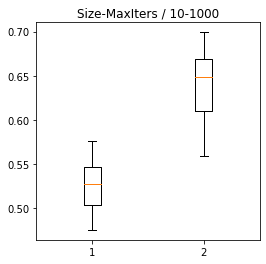

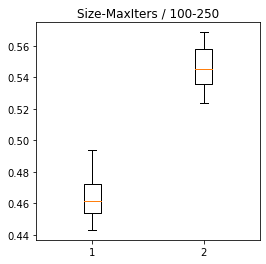

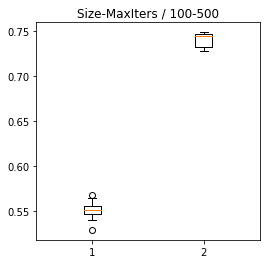

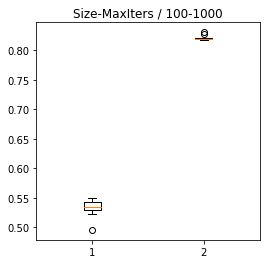

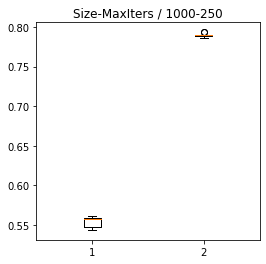

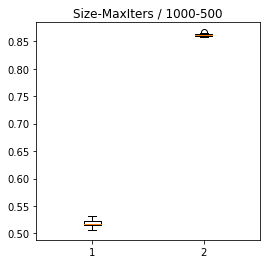

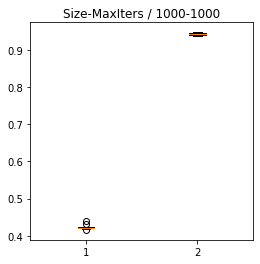

In [ ]:
for key in dicStandar: #Boxplots del Dataset Estandarizado
  fig, ax = plt.subplots(figsize=(4,4))
  plt.title("Size-MaxIters / " + key)
  plt.boxplot(dicStandar[key])

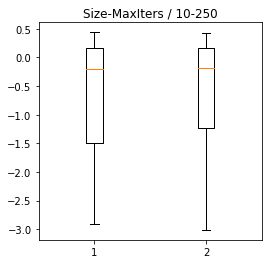

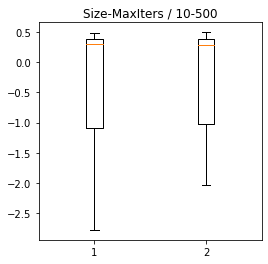

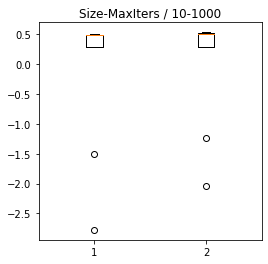

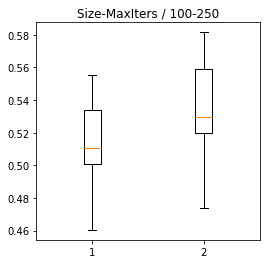

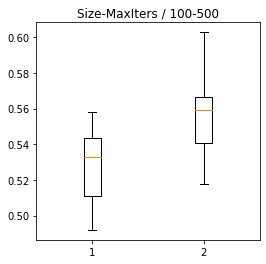

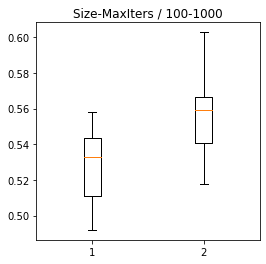

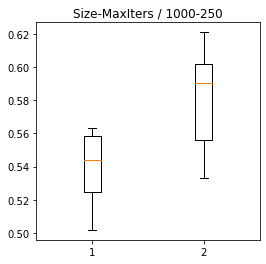

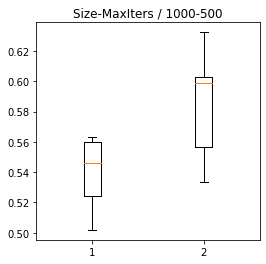

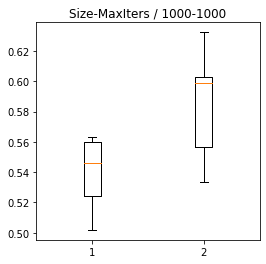

In [ ]:

for key in dicOriginal: #Boxplots del Dataset Original
  fig, ax = plt.subplots(figsize=(4,4))
  plt.title("Size-MaxIters / " + key)
  plt.boxplot(dicOriginal[key])

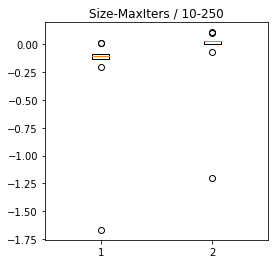

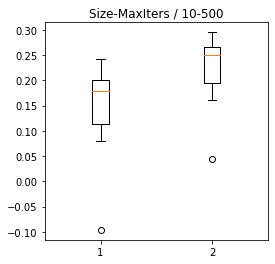

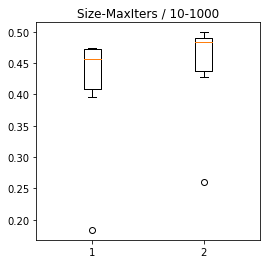

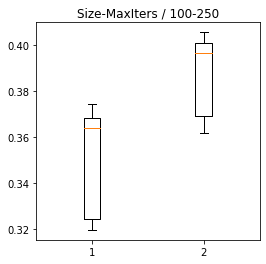

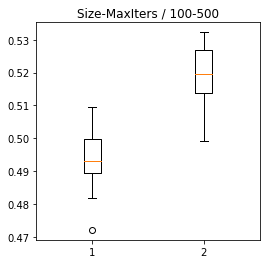

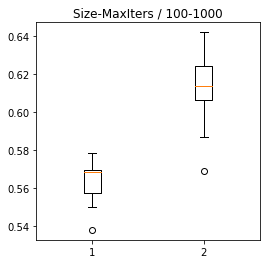

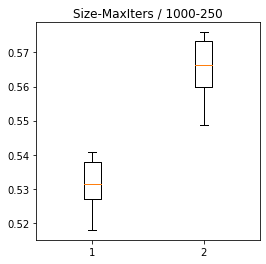

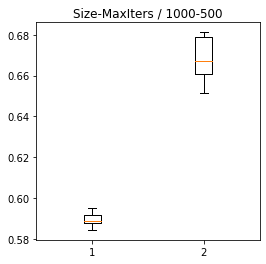

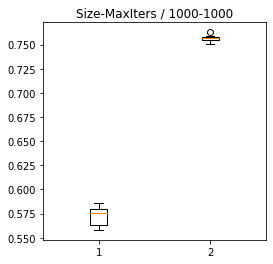

In [ ]:
for key in dicMinMax:  #Boxplots del Dataset MinMax
  pfig, ax = plt.subplots(figsize=(4,4))
  plt.title("Size-MaxIters / " + key)
  plt.boxplot(dicMinMax[key])

Después de observar con detenimiento los resultados podemos sacar algunas conclusiones. En primer lugar vemos que para los tres dataset hay alta relación directa entre el numero maximo de iteraciones y el score. Cuanto mayor es el numero de iteraciones mayor es el score. Lo mismo pasa con el tamaño de las capas, observamos que en los tres casos, el mejor resultado lo obtenemos con size = 1000 y NºIters = 1000.

Otro observación bastante evidente, es que los datos de train dan mejores resultados, cosa que no nos sorprende ya que es lo esperado.

Por último, si comparamos los resultados de los Datasets entre ellos, vemos que los mejores resultados los obtenemos con los datos estandarizados. Esto se debe a que el modelo espera que los datos vengan estandarizados, y por eso en este dataSet vemos unso resultados notablemente mejores. Un claro ejemplo de esto lo podemos ver fijandonos en el mejor resultado de cada uno de ellos. Para el original tenemos un score maxinmo de 0.60 aprox. Para el MinMax tenemos un scores de 0.750 aprox. Y para el estandarizado un score maximo por arriba de 0.9.


# Apartado C)

En este apartado repetiremos el proceso del apartado B, pero esta vez fijaremos el número maximo de iteraciones a 1000. También activaremos el parámetro early_stopping, y asi ver si conseguimos una mejora.



In [ ]:
tamHidenLayer = [10, 100,1000]

randomseed = list(range(1,10,1))

dicOriginalC = {}
dicStandarC = {}
dicMinMaxC = {}

for i in tamHidenLayer:
    scoresTest = []
    scoresTrain = []

    scoresTrainStandar = []
    scoresTestStandar = []

    scoresTrainMinMax = []
    scoresTestMinMax = []

    for k in randomseed:
      
      regr = MLPRegressor(hidden_layer_sizes=i, activation='relu', random_state=k, max_iter=1000,early_stopping=True).fit(X_train, Y_train)
      regrScaled = MLPRegressor(hidden_layer_sizes=i, activation='relu', random_state=k, max_iter=1000,early_stopping=True).fit(X_train_scaled, Y_train)
      regrMinMax = MLPRegressor(hidden_layer_sizes=i, activation='relu', random_state=k, max_iter=1000,early_stopping=True).fit(X_train_minmax, Y_train)

      scoresTest.append(regr.score(X_test, Y_test))
      scoresTrain.append(regr.score(X_train, Y_train))

      scoresTestStandar.append(regrScaled.score(X_test_scaled, Y_test))
      scoresTrainStandar.append(regrScaled.score(X_train_scaled, Y_train))

      scoresTrainMinMax.append(regrMinMax.score(X_train_minmax, Y_train))
      scoresTestMinMax.append(regrMinMax.score(X_test_minmax, Y_test))



    nom = str(i)
    dicOriginalC[nom] = (scoresTest, scoresTrain)
    dicStandarC[nom] = (scoresTestStandar, scoresTrainStandar)
    dicMinMaxC[nom] = (scoresTrainMinMax, scoresTestMinMax)


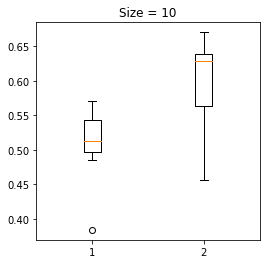

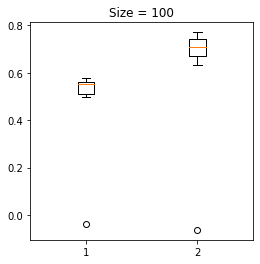

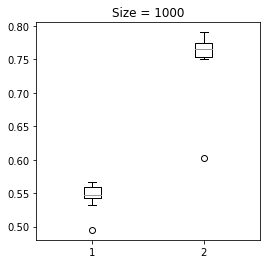

In [9]:
for key in dicStandarC:
  fig, ax = plt.subplots(figsize=(4,4))
  plt.title("Size = "+key)
  plt.boxplot(dicStandarC[key])

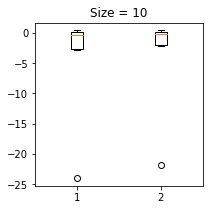

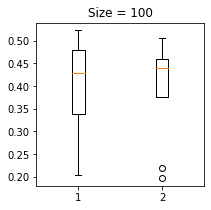

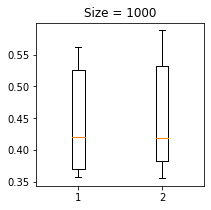

In [10]:
for key in dicOriginalC:
  fig, ax = plt.subplots(figsize=(3,3))
  plt.title("Size = "+key)
  plt.boxplot(dicOriginalC[key])

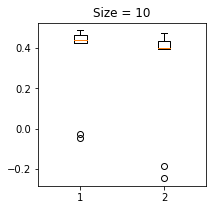

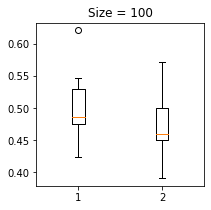

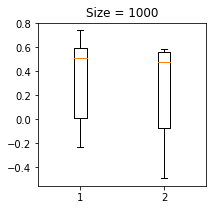

In [11]:
for key in dicMinMaxC:
  fig, ax = plt.subplots(figsize=(3,3))
  plt.title("Size = " + key)
  plt.boxplot(dicMinMaxC[key])

# Conclusión

En este apartado vemos que el dataset esrandarizado sigue dando los mejores resultados, sin embargo no llega a conseguir unos resultados tan buenos como en el apartado anterior. También vemos que se sigue manteniendo esa relación entre el tamaño y el score.

Podemos decir que el parámetro de early_stopping no mejore el comportamiento de la red, esto puede ser debido a que la función de perdida sea inestable y al utilizar este parámetro se confunda y pare de hacer iteracines cuando realmente todavía se podía mejorar más.